# 1. Imports & Configuration


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

import warnings
warnings.filterwarnings("ignore")

RANDOM_STATE = 42


2. Load Train & Test Data

In [18]:
train_path = "../../data/processed/preprocessed_train_data.csv"
test_path  = "../../data/processed/preprocessed_test_data.csv"
# train_path = "/content/preprocessed_train_data.csv"
# test_path  = "/content/preprocessed_test_data.csv"

train_df = pd.read_csv(train_path)
test_df  = pd.read_csv(test_path)

print("Train shape:", train_df.shape)
print("Test shape :", test_df.shape)

Train shape: (7642, 22)
Test shape : (3337, 22)


3. Basic Data Inspection

In [19]:
train_df.head()
train_df.info()
train_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7642 entries, 0 to 7641
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   output   7642 non-null   float64
 1   input1   7642 non-null   float64
 2   input2   7642 non-null   float64
 3   input3   7642 non-null   float64
 4   input4   7642 non-null   float64
 5   input5   7642 non-null   float64
 6   input6   7642 non-null   float64
 7   input7   7642 non-null   float64
 8   input8   7642 non-null   float64
 9   input9   7642 non-null   float64
 10  input10  7642 non-null   float64
 11  input11  7642 non-null   float64
 12  input12  7642 non-null   float64
 13  input13  7642 non-null   float64
 14  input14  7642 non-null   float64
 15  input15  7642 non-null   float64
 16  input16  7642 non-null   float64
 17  input17  7642 non-null   float64
 18  input18  7642 non-null   float64
 19  input19  7642 non-null   float64
 20  input20  7642 non-null   float64
 21  input21  7642 

,0
output,0
input1,0
input2,0
input3,0
input4,0
input5,0
input6,0
input7,0
input8,0
input9,0


Feature / Target Split

In [20]:
TARGET = "output"

X_train = train_df.drop(columns=[TARGET])
y_train = train_df[TARGET]

X_test = test_df.drop(columns=[TARGET])
y_test = test_df[TARGET]

print("X_train:", X_train.shape)
print("X_test :", X_test.shape)


X_train: (7642, 21)
X_test : (3337, 21)


5. Evaluation Function

In [21]:
def evaluate_model(y_true, y_pred, model_name="Model"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"{model_name}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE : {mae:.4f}")
    print(f"R²  : {r2:.4f}")
    print("-" * 30)

    return rmse, mae, r2


6. Model 1 — Linear Regression (Baseline)

In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
evaluate_model(y_test, y_pred_lr, "Linear Regression")


Linear Regression
RMSE: 0.2955
MAE : 0.2828
R²  : -9.8130
------------------------------


(np.float64(0.29554600725662683), 0.2828176641131316, -9.81304912972446)

7. Model 2 — Support Vector Regression (SVR)

In [30]:
# svr_pipeline = Pipeline([
#     ("scaler", StandardScaler()),
#     ("svr", SVR(kernel="rbf"))
# ])

# svr_pipeline.fit(X_train, y_train)
# y_pred_svr = svr_pipeline.predict(X_test)

# evaluate_model(y_test, y_pred_svr, "Support Vector Regression")

from sklearn.model_selection import GridSearchCV

svr_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR())
])

param_grid = {
    "svr__kernel": ["rbf"],
    "svr__C": [0.1, 1, 10, 100, 1000],
    "svr__gamma": ["scale", 0.01, 0.1, 1],
    "svr__epsilon": [0.001, 0.01, 0.1, 0.5]
}

grid_search = GridSearchCV(
    svr_pipeline,
    param_grid,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_svr = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

y_pred_svr = best_svr.predict(X_test)
evaluate_model(y_test, y_pred_svr, "Support Vector Regression")






Best parameters: {'svr__C': 0.1, 'svr__epsilon': 0.5, 'svr__gamma': 'scale', 'svr__kernel': 'rbf'}
Support Vector Regression
RMSE: 0.1165
MAE : 0.0909
R²  : -0.6807
------------------------------


(np.float64(0.11651982662704574), 0.09090475941777075, -0.6807288028688261)

8. Model 3 — Random Forest Regressor

In [24]:
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")


Random Forest Regressor
RMSE: 0.1395
MAE : 0.1146
R²  : -1.4084
------------------------------


(np.float64(0.13948192837705822), 0.1145667417448252, -1.4084291177540167)

9. Model 4 — Multi-Layer Perceptron (MLP)

In [25]:
mlp_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPRegressor(
        hidden_layer_sizes=(64, 64),
        activation="relu",
        max_iter=500,
        random_state=RANDOM_STATE
    ))
])

mlp_pipeline.fit(X_train, y_train)
y_pred_mlp = mlp_pipeline.predict(X_test)

evaluate_model(y_test, y_pred_mlp, "MLP Regressor")


MLP Regressor
RMSE: 0.6105
MAE : 0.5635
R²  : -45.1453
------------------------------


(np.float64(0.610541104637887), 0.5635074728926631, -45.14533459979063)

10. Model Comparison Table

In [26]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "SVR", "Random Forest", "MLP"],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_svr)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        np.sqrt(mean_squared_error(y_test, y_pred_mlp)),
    ],
    "R2 Score": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_svr),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_mlp),
    ]
})

results.sort_values(by="RMSE")


,Model,RMSE,R2 Score
1,SVR,0.121498,-0.827406
2,Random Forest,0.139482,-1.408429
0,Linear Regression,0.295546,-9.813049
3,MLP,0.610541,-45.145335


11. Save Results

In [27]:
results.to_csv("../../results/tables/model_comparison.csv", index=False)
# results.to_csv("/content/model_comparison.csv", index=False)

12. Prediction vs Actual Plot (Best Model)

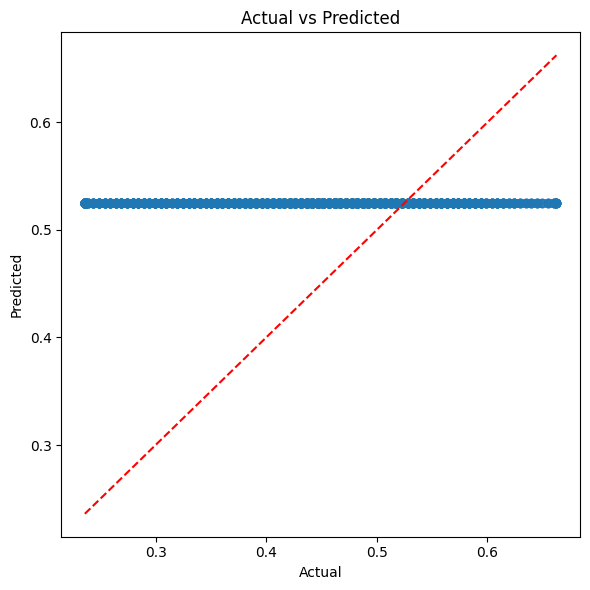

In [28]:
best_pred = y_pred_svr  # change if another model performs better

plt.figure(figsize=(6, 6))
plt.scatter(y_test, best_pred, alpha=0.6)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    "r--"
)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.tight_layout()
plt.show()
